In [1]:
!pip install bs4 requests

In [11]:
!python3 -m pip install networkx
import networkx as nx

In [2]:
import requests
from bs4 import BeautifulSoup
import urllib.parse
      
def get_urls(url):
    # Pobranie strony
    reqs = requests.get(url)
            
    # Parsowanie strony
    soup = BeautifulSoup(reqs.text, 'html.parser')
            
    urls = []  #lista url stron
            
    # Iteracja po wszystkich linkach na stronie z html 'a' <- lacze
    for link in soup.find_all('a'):
    # Parsowanie URL
      parsed_url = urllib.parse.urlparse(link.get('href'))
    # Dodaj tylko jeśli jest netloc 
      if parsed_url.netloc:
        urls.append(f"{parsed_url.scheme}://{parsed_url.netloc}")
    # Usuń duplikaty
    return list(set(urls))

In [8]:
L0 = get_urls('https://przymus.org/')
L0

['http://www.linkedin.com',
 'https://czasopisma.przymus.org',
 'https://github.com',
 'https://przymus.org',
 'http://getbootstrap.com',
 'http://www.univ-amu.fr',
 'http://www.lif.univ-mrs.fr',
 'http://scholar.google.pl',
 'http://www.informatik.uni-trier.de',
 'http://www.mat.umk.pl',
 'http://www.umk.pl',
 'https://www.researchgate.net',
 'http://docs.getpelican.com']

In [9]:
L1 = []
for link in L0:
  link2 = get_urls(link)
  for i in link2:
    L1.append(i)
print(L1)

['https://www.linkedin.com', 'https://press.linkedin.com', 'https://developer.linkedin.com', 'https://mobile.linkedin.com', 'https://blog.linkedin.com', 'https://business.linkedin.com', 'https://about.linkedin.com', 'https://learning.linkedin.com', 'https://brand.linkedin.com', 'https://przymus.org', 'https://www.gov.pl', 'https://apps.apple.com', 'https://socialimpact.github.com', 'https://lab.github.com', 'https://www.youtube.com', 'https://shop.github.com', 'https://github.com', 'https://www.npmjs.com', 'https://partner.github.com', 'https://github.community', 'https://www.githubstatus.com', 'https://www.electronjs.org', 'https://opensource.guide', 'https://docs.github.com', 'https://www.linkedin.com', 'https://play.google.com', 'https://atom.io', 'https://support.github.com', 'https://stars.github.com', 'https://github.blog', 'https://twitter.com', 'https://desktop.github.com', 'https://education.github.com', 'https://cli.github.com', 'https://www.facebook.com', 'https://services.g

In [12]:
G = nx.DiGraph()

level1 = set()
for p in L0:
  tmp = get_urls(p)
  level1 = level1.union(tmp)
  for g in tmp:
    G.add_edge(p,g)

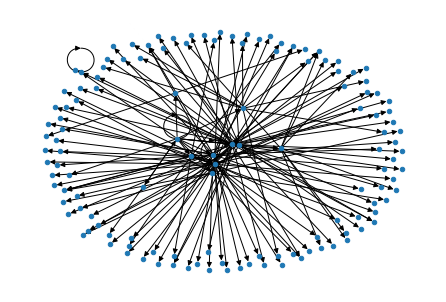

In [13]:
nx.draw(G, node_size=20)